/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


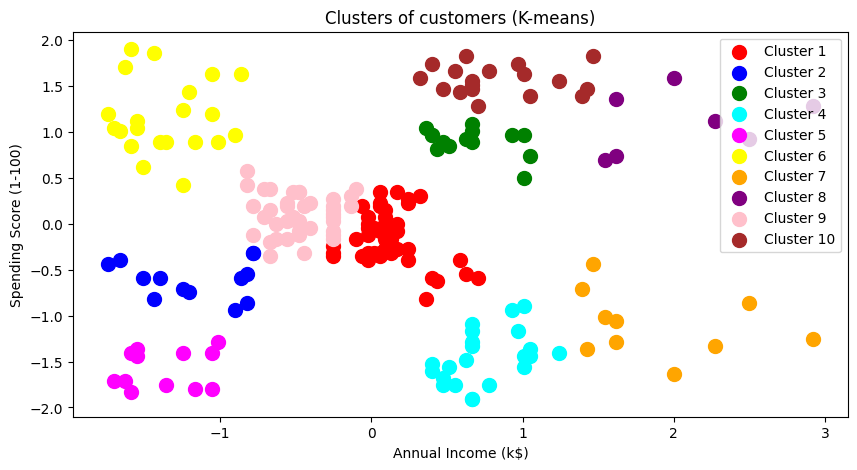

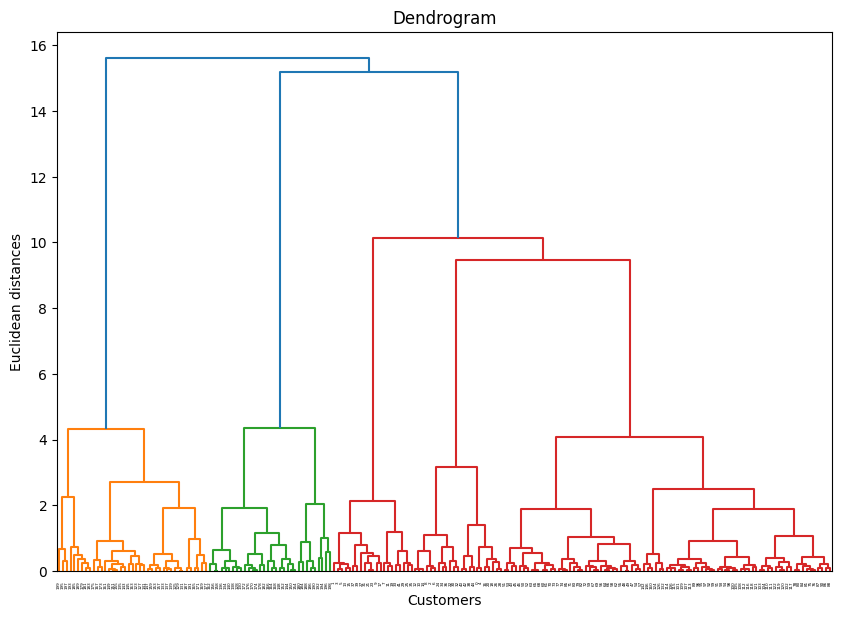

In [ ]:
#exp 5
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Load data (make sure you've downloaded it from the provided link)
data = pd.read_csv('/content/Mall_Customers.csv')

# Selecting relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Data normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(X_scaled)

# Visualizing the clusters for K-means
plt.figure(figsize=(10,5))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'pink', 'brown']
for i in range(10):
    plt.scatter(X_scaled[kmeans_clusters == i, 0], X_scaled[kmeans_clusters == i, 1],
                s = 100, c = colors[i], label = f'Cluster {i+1}')

plt.title('Clusters of customers (K-means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Dendrogram for Hierarchical clustering
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=90, fontsize=3)
plt.show()

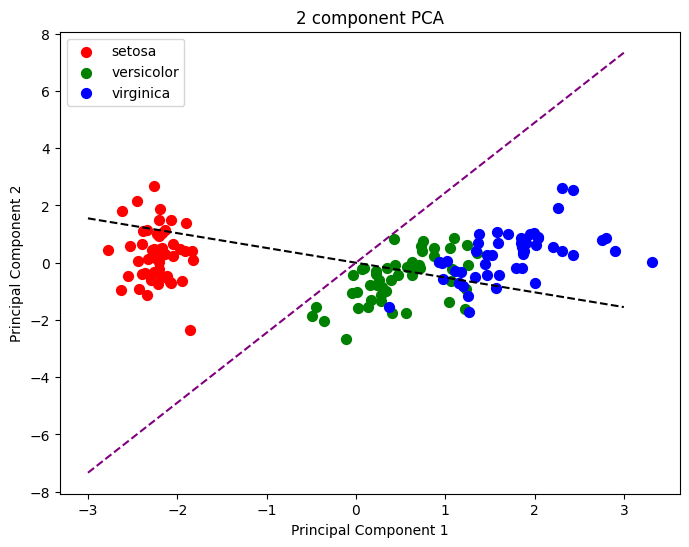

In [ ]:
#exp 6
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardizing the features
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2) # reduce to 2 dimensions
principalComponents = pca.fit_transform(X_std)

# Creating a DataFrame for the results
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=['target'])], axis = 1)

# Plotting the results
plt.figure(figsize=(8,6))
targets = list(iris.target_names)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == iris.target_names.tolist().index(target)
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

# Plotting the line of principal component analysis
explained_variance = pca.explained_variance_ratio_
pc1 = pca.components_[0]
pc2 = pca.components_[1]
x = np.linspace(-3, 3, 100)
y1 = pc1[1]/pc1[0] * x
y2 = pc2[1]/pc2[0] * x
plt.plot(x, y1, color='black', linestyle='--')
plt.plot(x, y2, color='purple', linestyle='--')

plt.title('2 component PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.show()

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2565 - accuracy: 0.9255
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1118 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0762 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0561 - accuracy: 0.9831
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9752
Test accuracy: 0.9751999974250793
1/1 [==============================] - 0s 102ms/step


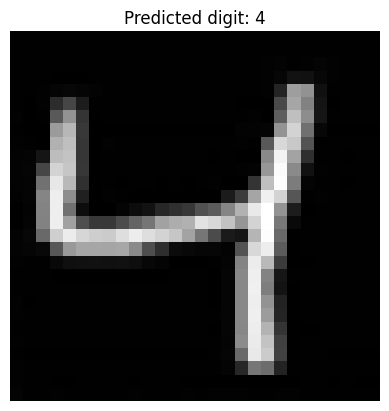

Predicted digit: 4


In [ ]:
#exp7
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Function to preprocess and predict a given image
def predict_digit(img_path):
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_arr = np.array(img)
    img_arr = img_arr / 255.0  # Normalize
    img_arr = img_arr.reshape(1, 28, 28)  # Reshape to fit model input
    prediction = model.predict(img_arr)
    predicted_digit = np.argmax(prediction)

    # Display the input image and the predicted digit
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted digit: {predicted_digit}")
    plt.axis('off')
    plt.show()

    return predicted_digit

# Predicting a given image (replace 'path_to_image' with the actual image path)
prediction = predict_digit('/content/4.jpg')
print("Predicted digit:", prediction)

In [ ]:
#exp8
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
# Dataset URL: https://archive.ics.uci.edu/ml/datasets/spambase
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None)

# Splitting data and labels
X = data.iloc[:, :-1] # Features
y = data.iloc[:, -1] # Labels

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the SVM classifier
clf = svm.SVC(gamma='scale')
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[699 105]
 [337 240]]
              precision    recall  f1-score   support

           0       0.67      0.87      0.76       804
           1       0.70      0.42      0.52       577

    accuracy                           0.68      1381
   macro avg       0.69      0.64      0.64      1381
weighted avg       0.68      0.68      0.66      1381



[*********************100%%**********************]  1 of 1 completed


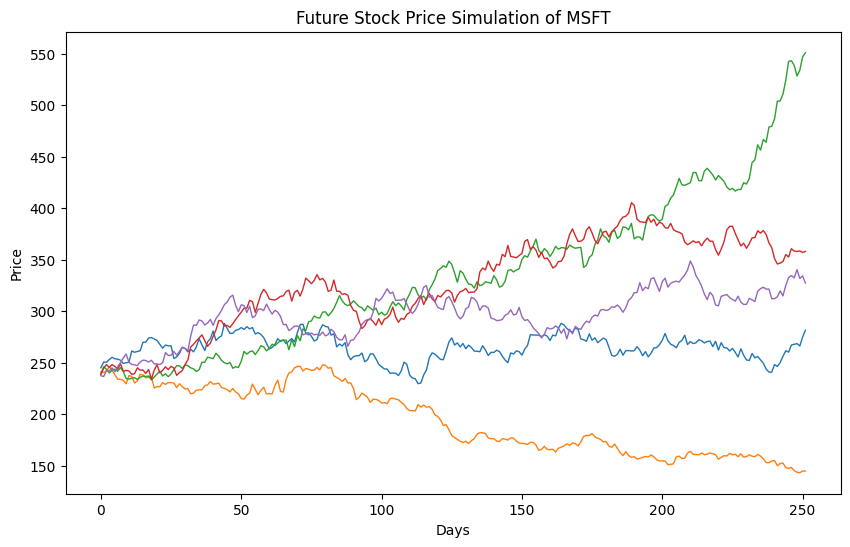

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

# Download historical stock prices from Yahoo Finance
ticker = 'MSFT'
data = yf.download(ticker, start="2010-01-01", end="2023-01-01")['Adj Close']

# Calculate the log returns
log_returns = np.log(1 + data.pct_change())

# Set up the Monte Carlo parameters
num_simulations = 5
num_days = 252  # Number of trading days in a year

last_price = data[-1]
results = np.zeros((num_simulations, num_days))

# Simulate the future stock prices
for i in range(num_simulations):
    prices = [last_price]
    for j in range(num_days):
        prices.append(prices[j] * np.exp(log_returns.mean() + log_returns.std() * norm.ppf(np.random.rand())))
    results[i, :] = prices[1:]

# Plotting the simulations
plt.figure(figsize=(10,6))
plt.plot(results.T, lw=1)
plt.title(f"Future Stock Price Simulation of {ticker}")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

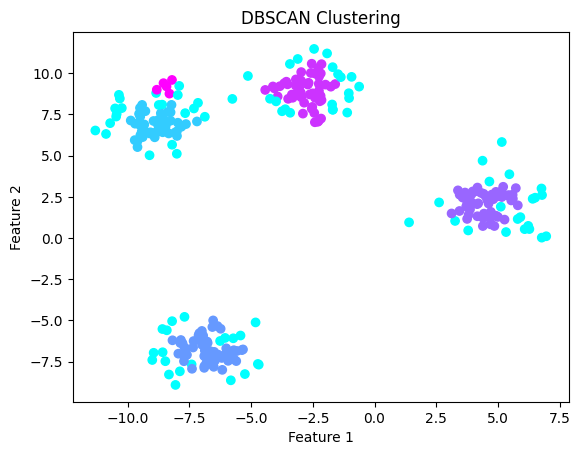

In [ ]:
#exp 11
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate sample data using the "make_blobs" function for clustering
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply the DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='cool')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
#exp 4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Load the dataset
data = pd.read_csv('/content/Social_Network_Ads.csv')

# Step 2: Preprocess the data
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Step 3: Split the data into training and testing sets
X = data.drop(['User ID','Purchased'], axis=1)
y = data['Purchased']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Train the models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Step 5: Evaluate the models
logreg_pred = logreg.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)

# Calculate confusion matrix and classification report for Logistic Regression
logreg_cm = confusion_matrix(y_test, logreg_pred)
logreg_cr = classification_report(y_test, logreg_pred)

# Calculate confusion matrix and classification report for K-Nearest Neighbors
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cr = classification_report(y_test, knn_pred)

# Calculate confusion matrix and classification report for Decision Tree
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cr = classification_report(y_test, dt_pred)

print("Confusion Matrix for Logistic Regression:")
print(logreg_cm)
print("Classification Report for Logistic Regression:")
print(logreg_cr)

print("Confusion Matrix for K-Nearest Neighbors:")
print(knn_cm)
print("Classification Report for K-Nearest Neighbors:")
print(knn_cr)

print("Confusion Matrix for Decision Tree:")
print(dt_cm)
print("Classification Report for Decision Tree:")
print(dt_cr)

Confusion Matrix for Logistic Regression:
[[52  0]
 [28  0]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80

Confusion Matrix for K-Nearest Neighbors:
[[46  6]
 [ 8 20]]
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80

Confusion Matrix for Decision Tree:
[[47  5]
 [ 7 21]]
Classification Report for Decision Tree:
              precision    recall 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Squared Error: 46.144775347317264


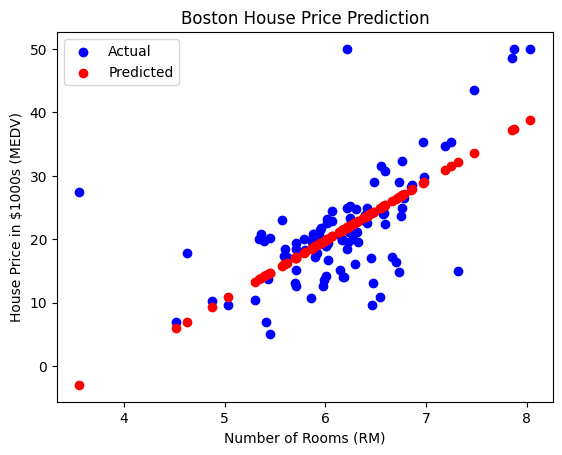

In [ ]:
#exp 3a
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd


# Load the Boston housing dataset
data = pd.read_csv('/content/BostonHousing.csv')
X = data['rm']  # Selecting a single feature (column 5 - RM)
y = data['medv']

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the results
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')  # Fix: Select the first column of X_test
plt.scatter(X_test[:, 0], y_pred, color='red',  label='Predicted')  # Fix: Select the first column of X_test
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('House Price in $1000s (MEDV)')
plt.title('Boston House Price Prediction')
plt.legend()
plt.show()


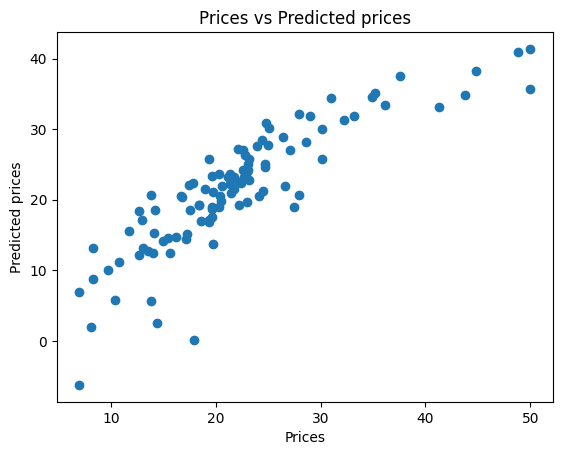

Training Score: 0.738339392059052
Test Score: 0.7334492147453091


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


data = pd.read_csv('/content/BostonHousing.csv')
X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

y_pred = reg.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()



train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)
print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

In [ ]:
#exp 9
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
import nltk


# Download NLTK stopwords
nltk.download('stopwords')

url = 'https://raw.githubusercontent.com/crwong/cs224u-project/master/data/sentiment/training.1600000.processed.noemoticon.csv'
# Downloading the dataset
data = pd.read_csv(url, encoding='latin-1', header=None)
data.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Tweet']

# Preprocessing
data['Tweet'] = data['Tweet'].str.lower()  # convert to lowercase
stop_words = stopwords.words('english')
data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Mapping sentiment to 0 (negative) and 1 (positive)
data['Sentiment'] = data['Sentiment'].map({0: 0, 4: 1})

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Tweet'], data['Sentiment'], test_size=0.2, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the classifier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[[1599  419]
 [ 599 1383]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2018
           1       0.77      0.70      0.73      1982

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.74      4000
weighted avg       0.75      0.75      0.74      4000



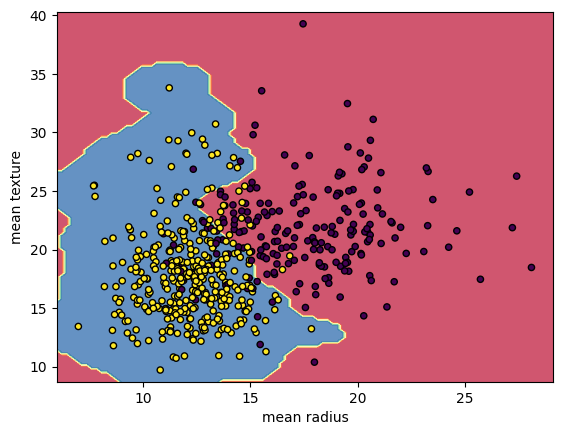

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()

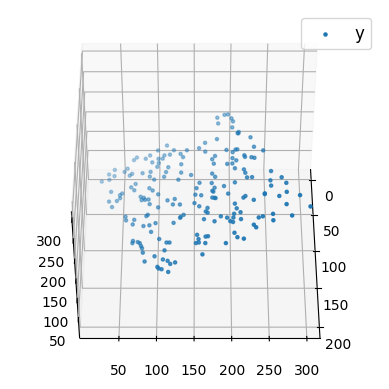

In [ ]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def generate_dataset(n):
	x = []
	y = []
	random_x1 = np.random.rand()
	random_x2 = np.random.rand()
	for i in range(n):
		x1 = i
		x2 = i/2 + np.random.rand()*n
		x.append([1, x1, x2])
		y.append(random_x1 * x1 + random_x2 * x2 + 1)
	return np.array(x), np.array(y)

x, y = generate_dataset(200)

mpl.rcParams['legend.fontsize'] = 12

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')

ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)

plt.show()


In [ ]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 95.0
